<a href="https://colab.research.google.com/github/DavidkingMazimpaka/transfer_learning_assignment/blob/main/Transfer_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mission and GCGOs (Great Challenges and Great Opportunities)

---


**My mission is to harness the power of AI to revolutionize healthcare in Rwanda by enhancing advanced technologies for the early detection and effective treatment of complex diseases, improving patient outcomes, and driving medical innovation in the region.**


1.   **Healthcare**: to improve healthcare by leveraging AI to enhance the detection and treatment of complex diseases
2.   **Infrastructure**: the development of advanced medical technologies, data systems, and AI-powered tools that can be integrated into Rwanda's healthcare framework.
3. **Education**: building the necessary skills and knowledge among healthcare professionals and data scientists and promotes educational programs that equip individuals in Rwanda to support and sustain these AI-driven healthcare innovations.

### **Brain Tumor Detection**
This project is one the main project that is part of my mission, that's why I have chosen it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brian-tumor-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1343913%2F2236708%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240908%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240908T211004Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D884a1a53256e3ce4afb7e849aa760d745f94dd38d0ab645ccd501062ae79e7e02f52bbc322ef26dffcda33b5b37803a57ab1782074838280563f0e77517476a0189c4b4bb065f4259626fdf26d5e1e4da4977fb126944e49b28a899361210dacc174972e798b7131e44d1ef859ba3596424e7a4724fa077f45279d99e8f390de89447bd73cf923e4570420d1dce6e9322c3e252c44d22d2a18ca2e451599d8fe1acf2068179ddee898f08111f2382c353f614e0f8548b5590c48c6754451c1b490a9574f57347b19714248cf8c6f8111d24c4b158ac94f2aced1ed890cc0962dbfeb618e43dc043bd09efeead31c21075cb6261bf201f302400127db2f09a44a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 112499141 bytes downloaded
Downloaded and uncompressed: brian-tumor-dataset
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brian-tumor-dataset/metadata.csv
/kaggle/input/brian-tumor-dataset/metadata_rgb_only.csv
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (982).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (531).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1037).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1452).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1053).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (751).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1091).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1088).jpg
/kaggle/input/brian-tumor-dataset/Brain Tumo

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

# Training the model with selected Pre-trained Models (VGG16, ResNet50, InceptionV3)

### 1. Import necessary Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2. Data Preparation

In [12]:
# Using ImageDataGenerator to prepare the dataset
gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train = gen.flow_from_directory(
    "/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/",
    target_size=(100, 100),
    batch_size=16,
    class_mode="binary",
    color_mode="rgb",
    shuffle=True,
    seed=123,
    subset="training"
)

val = gen.flow_from_directory(
    "/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/",
    target_size=(100, 100),
    batch_size=8,
    class_mode="binary",
    color_mode="rgb",
    shuffle=True,
    seed=123,
    subset="validation"
)

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


### 3. Define Pre-trained Models

In [13]:
# defining functions to load and modify each model
def create_vgg16_model():
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
     # Limiting the number of layers by using only a few
    for layer in base_model.layers[:-5]:  # Freezing all but the last 5 layers
        layer.trainable = False
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def create_resnet50_model():
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    for layer in base_model.layers[:-5]:  # Freezing all but the last 5 layers
        layer.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def create_inceptionv3_model():
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
    for layer in base_model.layers[:-5]:  # Freezing all but the last 5 layers
        layer.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

### 4. Compile the Models

In [8]:
# Creating a function to compile models
def compile_model(model):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 5. Train the Models

In [14]:
# Train each model in a loop
models_to_train = {
    "VGG16": create_vgg16_model(),
    "ResNet50": create_resnet50_model(),
    "InceptionV3": create_inceptionv3_model()
}

history_dict = {}
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

for model_name, model in models_to_train.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(f'Training {model_name}...')
    history = model.fit(
        train,
        epochs=5,  # Start with a smaller number of epochs
        validation_data=val,
        callbacks=[early_stopping]
    )
    history_dict[model_name] = history

Training VGG16...
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.6730 - loss: 0.6541 - val_accuracy: 0.9042 - val_loss: 0.2506
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.9203 - loss: 0.1965 - val_accuracy: 0.9064 - val_loss: 0.2143
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.9453 - loss: 0.1759 - val_accuracy: 0.9576 - val_loss: 0.1274
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.9779 - loss: 0.0663 - val_accuracy: 0.9075 - val_loss: 0.2056
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 703s 3s/step - accuracy: 0.9828 - loss: 0.0610 - val_accuracy: 0.9695 - val_loss: 0.0851
Training ResNet50...
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 228s 947ms/step - accuracy: 0.6580 - loss: 0.6455 - val_accuracy: 0.5974 - val_loss: 0.7208
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.7549 - loss: 0.5045 - val_accuracy: 0.5996 - val_loss: 0.7299
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 218s 940ms/step - accur

### 6. Evaluate and Visualize Results

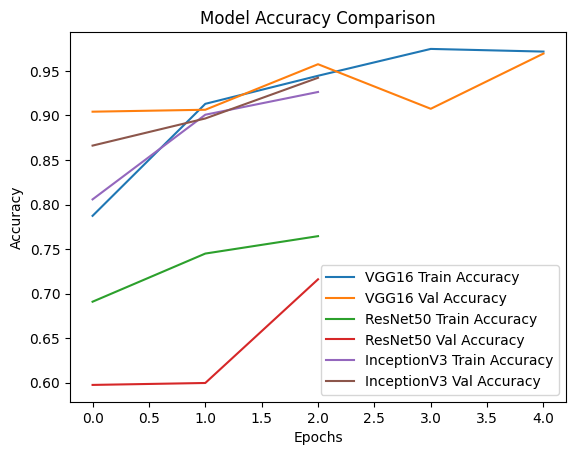

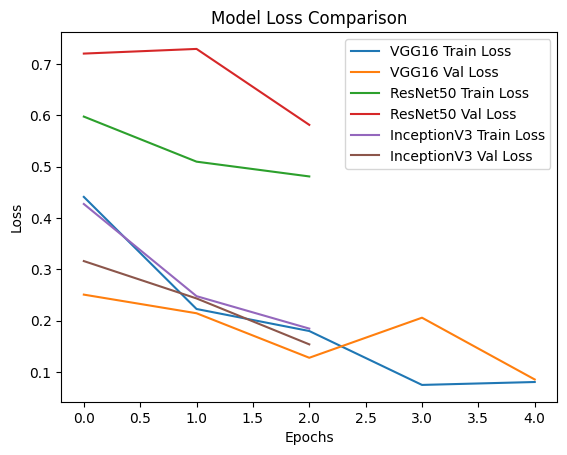

In [15]:
# plotting the training history for each model to compare performance

import matplotlib.pyplot as plt

# Evaluate and visualize results
for model_name, history in history_dict.items():
    # Plotting accuracy
    plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Val Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
for model_name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Val Loss')

plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Performance Metrics Evaluation

In [16]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate performance metrics for each model
for model_name, model in models_to_train.items():
    # Generate predictions on validation set
    val_images, val_labels = next(val)  # Get a batch of validation data
    val_predictions = model.predict(val_images)
    val_pred_labels = (val_predictions > 0.5).astype(int)  # Convert probabilities to binary labels

    # Classification report
    print(f"Performance Metrics for {model_name}:")
    print(classification_report(val_labels, val_pred_labels, target_names=['No Tumor', 'Tumor']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
Performance Metrics for VGG16:
              precision    recall  f1-score   support

    No Tumor       1.00      1.00      1.00         3
       Tumor       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Performance Metrics for ResNet50:
              precision    recall  f1-score   support

    No Tumor       1.00      0.17      0.29         6
       Tumor       0.29      1.00      0.44         2

    accuracy                           0.38         8
   macro avg       0.64      0.58      0.37         8
weighted avg       0.82      0.38      0.33         8

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Performance Metrics for InceptionV3:
              precision    recall  f1-score   support

    No Tumor       1.00      1.00      1.00         3
       Tumor       1.00 